# 🏠 Regression Analysis – House Price Prediction
Using `Linear Regression` with `house_prices.csv` dataset


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv('house_prices.csv')
print("First few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First few rows:
   Size Location  Number of Rooms   Price
0  3974    Urban                1  733496
1  1660    Urban                6  382970
2  2094    Urban                5  439182
3  1930    Rural                1  263049
4  1895    Urban                3  378848

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             100 non-null    int64 
 1   Location         100 non-null    object
 2   Number of Rooms  100 non-null    int64 
 3   Price            100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None


In [5]:
# Handle missing values
print("\nMissing Values:")
print(df.isnull().sum())

df['Size'] = df['Size'].fillna(df['Size'].median())
df['Number of Rooms'] = df['Number of Rooms'].fillna(df['Number of Rooms'].median())
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Price'] = df['Price'].fillna(df['Price'].median())


Missing Values:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


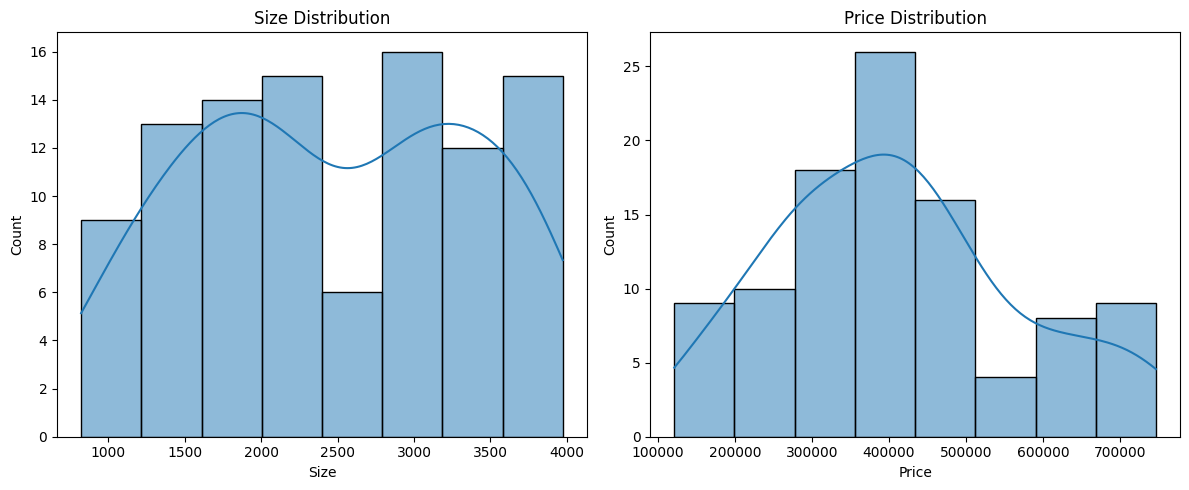

In [6]:
# Plot distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Size'], kde=True)
plt.title("Size Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")

plt.tight_layout()
plt.show()

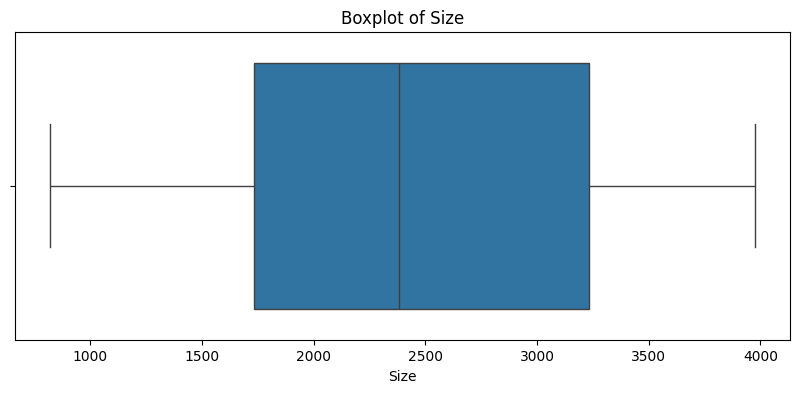

In [7]:
# Boxplot for outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Size'])
plt.title("Boxplot of Size")
plt.show()


Correlation Matrix:
                     Size  Number of Rooms     Price
Size             1.000000         0.063672  0.904107
Number of Rooms  0.063672         1.000000  0.148236
Price            0.904107         0.148236  1.000000


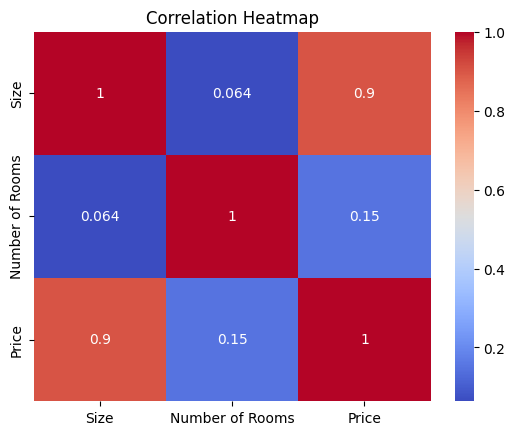

In [9]:
# Correlation heatmap (only for numeric columns)
numeric_df = df.select_dtypes(include=[np.number])

print("\nCorrelation Matrix:")
print(numeric_df.corr())

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Define features 
features = ['Size', 'Location', 'Number of Rooms']
target = 'Price'

In [11]:
# Preprocessing Pipeline
numerical = ['Size', 'Number of Rooms']
categorical = ['Location']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

model_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

In [12]:
# Train - Test split & Train model
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

RMSE: 25655.82
R² Score: 0.9771


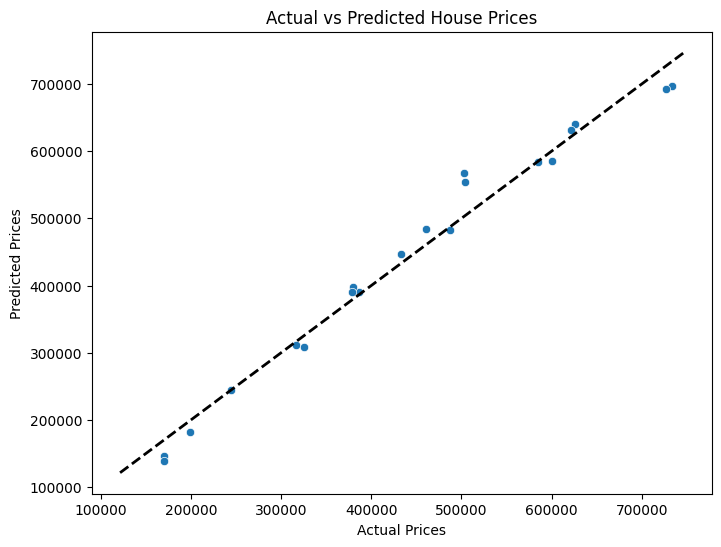

In [13]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [14]:
# Feature importance
feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numerical).tolist()
feature_names += preprocessor.named_transformers_['cat'].get_feature_names_out(categorical).tolist()

coefficients = model_pipeline.named_steps['regressor'].coef_

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
             Feature    Coefficient
0               Size  137130.939405
3     Location_Urban  135113.946382
2  Location_Suburban   57202.861662
1    Number of Rooms   15998.391206


In [15]:
# Save predictions
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

predictions_df.to_csv("house_price_predictions.csv", index=False)